In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn import preprocessing
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Generate training data with varied noise

In [2]:
def f(x, sigma):
    epsilon = np.random.randn(*x.shape) * sigma
    return (x-5)**2 + epsilon
train_size = 300

X = np.geomspace(1, 10, train_size).reshape(-1, 1)
Y_true = f(X, sigma=0.0)
Y = np.zeros(X.shape)
for i in range(len(X)):
    x = X[i]
    if 4<x<10:
        Y[i] = f(x, sigma=abs(x)-4)
    else:
        Y[i] = f(x, sigma=0)        
print(X.shape)

(300, 1)


Visualize training data

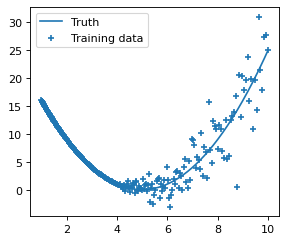

In [3]:
cm = 1/2.54
fig, ax = plt.subplots(1, figsize=(9*cm, 8*cm), sharey='row', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, right=.98, top=0.98, bottom=0.15, hspace = 0.65, wspace=0.15)
ax.scatter(X, Y, marker='+', label='Training data')
ax.plot(X, Y_true, label='Truth')
plt.legend()

Loss function, Distribution layer, and KL diverenge

In [4]:
def NLL(y, distr): 
  return -distr.log_prob(y) 

def normal_sp(params): 
  return tfp.distributions.Normal(loc=params[:,0:1], scale=1e-3
                                  + tf.math.softplus(0.05 * params[:,1:2])) #both parameters are learnable

kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (X.shape[0] )
bias_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (X.shape[0] )

Build the network

In [5]:
inputs = tf.keras.layers.Input(shape=(X.shape[1],))

hidden = tfp.layers.DenseFlipout(20,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="relu")(inputs)
hidden = tfp.layers.DenseFlipout(32,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="relu")(hidden)
hidden = tfp.layers.DenseFlipout(20,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="relu")(hidden)
params = tfp.layers.DenseFlipout(2,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn)(hidden)
dist = tfp.layers.DistributionLambda(normal_sp)(params)


model = Model(inputs=inputs, outputs=dist)
model.compile(Adam(learning_rate=___), loss=NLL) # CHOOSE THE LEARNING RATE
model_params = Model(inputs=inputs, outputs=params)
model.summary()

C:\Users\Administrateur\anaconda3\envs\VUB\lib\site-packages\tensorflow_probability\python\layers\util.py:99: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  loc = add_variable_fn(
C:\Users\Administrateur\anaconda3\envs\VUB\lib\site-packages\tensorflow_probability\python\layers\util.py:109: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  untransformed_scale = add_variable_fn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_flipout (DenseFlipout  (None, 20)               80        
 )                                                               
                                                                 
 dense_flipout_1 (DenseFlipo  (None, 32)               1344      
 ut)                                                             
                                                                 
 dense_flipout_2 (DenseFlipo  (None, 20)               1320      
 ut)                                                             
                                                                 
 dense_flipout_3 (DenseFlipo  (None, 2)                84        
 ut)                                                         

Train the network

In [6]:
epoch = ___ # CHOOSE THE NUMBER OF TRAINING EPISODES
batch_size = ___ # CHOOSE THE BATCH SIZE
model.fit(X, Y, epochs=epoch, verbose=1, batch_size = batch_size)

Epoch 1/10000
2/2 [==============================] - 2s 3ms/step - loss: 109.6432
Epoch 2/10000
2/2 [==============================] - 0s 2ms/step - loss: 108.9506
Epoch 3/10000
2/2 [==============================] - 0s 3ms/step - loss: 109.3830
Epoch 4/10000
2/2 [==============================] - 0s 3ms/step - loss: 108.8746
Epoch 5/10000
2/2 [==============================] - 0s 3ms/step - loss: 109.1773
Epoch 6/10000
2/2 [==============================] - 0s 2ms/step - loss: 108.7885
Epoch 7/10000
2/2 [==============================] - 0s 2ms/step - loss: 108.8339
Epoch 8/10000
2/2 [==============================] - 0s 3ms/step - loss: 109.4424
Epoch 9/10000
2/2 [==============================] - 0s 3ms/step - loss: 109.1091
Epoch 10/10000
2/2 [==============================] - 0s 3ms/step - loss: 109.4715
Epoch 11/10000
2/2 [==============================] - 0s 2ms/step - loss: 109.0910
Epoch 12/10000
2/2 [==============================] - 0s 3ms/step - loss: 108.4419
Epoch 13/1000

2/2 [==============================] - 0s 3ms/step - loss: 62.8887
Epoch 198/10000
2/2 [==============================] - 0s 3ms/step - loss: 62.8923
Epoch 199/10000
2/2 [==============================] - 0s 3ms/step - loss: 62.4123
Epoch 200/10000
2/2 [==============================] - 0s 3ms/step - loss: 61.1945
Epoch 201/10000
2/2 [==============================] - 0s 3ms/step - loss: 61.0721
Epoch 202/10000
2/2 [==============================] - 0s 3ms/step - loss: 61.0212
Epoch 203/10000
2/2 [==============================] - 0s 3ms/step - loss: 59.8902
Epoch 204/10000
2/2 [==============================] - 0s 2ms/step - loss: 61.2968
Epoch 205/10000
2/2 [==============================] - 0s 3ms/step - loss: 59.7074
Epoch 206/10000
2/2 [==============================] - 0s 2ms/step - loss: 60.0751
Epoch 207/10000
2/2 [==============================] - 0s 3ms/step - loss: 58.9363
Epoch 208/10000
2/2 [==============================] - 0s 2ms/step - loss: 57.6794
Epoch 209/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 30.7986
Epoch 394/10000
2/2 [==============================] - 0s 3ms/step - loss: 30.5530
Epoch 395/10000
2/2 [==============================] - 0s 2ms/step - loss: 31.6839
Epoch 396/10000
2/2 [==============================] - 0s 3ms/step - loss: 30.7670
Epoch 397/10000
2/2 [==============================] - 0s 3ms/step - loss: 30.4573
Epoch 398/10000
2/2 [==============================] - 0s 3ms/step - loss: 31.0215
Epoch 399/10000
2/2 [==============================] - 0s 3ms/step - loss: 29.6021
Epoch 400/10000
2/2 [==============================] - 0s 3ms/step - loss: 31.1309
Epoch 401/10000
2/2 [==============================] - 0s 3ms/step - loss: 30.2285
Epoch 402/10000
2/2 [==============================] - 0s 3ms/step - loss: 30.6017
Epoch 403/10000
2/2 [==============================] - 0s 3ms/step - loss: 30.1075
Epoch 404/10000
2/2 [==============================] - 0s 3ms/step - loss: 29.5048
Epoch 405/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 18.0459
Epoch 590/10000
2/2 [==============================] - 0s 3ms/step - loss: 18.1619
Epoch 591/10000
2/2 [==============================] - 0s 3ms/step - loss: 18.1847
Epoch 592/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.6927
Epoch 593/10000
2/2 [==============================] - 0s 3ms/step - loss: 17.7644
Epoch 594/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.4793
Epoch 595/10000
2/2 [==============================] - 0s 3ms/step - loss: 18.2188
Epoch 596/10000
2/2 [==============================] - 0s 3ms/step - loss: 17.8721
Epoch 597/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.7517
Epoch 598/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.6454
Epoch 599/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.6180
Epoch 600/10000
2/2 [==============================] - 0s 3ms/step - loss: 18.1314
Epoch 601/10000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 15.3844
Epoch 786/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.5443
Epoch 787/10000
2/2 [==============================] - 0s 3ms/step - loss: 15.7474
Epoch 788/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.6504
Epoch 789/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.6286
Epoch 790/10000
2/2 [==============================] - 0s 3ms/step - loss: 15.4989
Epoch 791/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.6892
Epoch 792/10000
2/2 [==============================] - 0s 3ms/step - loss: 15.5577
Epoch 793/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.6932
Epoch 794/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.5006
Epoch 795/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.4189
Epoch 796/10000
2/2 [==============================] - 0s 3ms/step - loss: 15.6060
Epoch 797/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 14.5598
Epoch 982/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.9652
Epoch 983/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.7498
Epoch 984/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.7629
Epoch 985/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.6548
Epoch 986/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.5612
Epoch 987/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.5654
Epoch 988/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.6014
Epoch 989/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.6891
Epoch 990/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.6281
Epoch 991/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.6544
Epoch 992/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.6172
Epoch 993/10000
2/2 

Epoch 1079/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.2507
Epoch 1080/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.3263
Epoch 1081/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.3398
Epoch 1082/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.2365
Epoch 1083/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.3660
Epoch 1084/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.6911
Epoch 1085/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.3764
Epoch 1086/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.2468
Epoch 1087/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.4301
Epoch 1088/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.6690
Epoch 1089/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.4623
Epoch 1090/10000
2/2 [==============================] - 0s 2ms/step - loss: 

2/2 [==============================] - 0s 3ms/step - loss: 13.9221
Epoch 1274/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.9602
Epoch 1275/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.1998
Epoch 1276/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.0152
Epoch 1277/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.9797
Epoch 1278/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.0647
Epoch 1279/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.8777
Epoch 1280/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.8987
Epoch 1281/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.8856
Epoch 1282/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.9763
Epoch 1283/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.9134
Epoch 1284/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.9597
Epoch 128

2/2 [==============================] - 0s 3ms/step - loss: 13.7467
Epoch 1468/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.5532
Epoch 1469/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.6239
Epoch 1470/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.7714
Epoch 1471/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.5831
Epoch 1472/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.5949
Epoch 1473/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.5757
Epoch 1474/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.5357
Epoch 1475/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.5841
Epoch 1476/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.6434
Epoch 1477/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.7918
Epoch 1478/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.5686
Epoch 147

2/2 [==============================] - 0s 2ms/step - loss: 13.3143
Epoch 1662/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.1200
Epoch 1663/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.0974
Epoch 1664/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2561
Epoch 1665/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2870
Epoch 1666/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2667
Epoch 1667/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.1419
Epoch 1668/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2148
Epoch 1669/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2374
Epoch 1670/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.3071
Epoch 1671/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.0858
Epoch 1672/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.2371
Epoch 167

2/2 [==============================] - 0s 3ms/step - loss: 12.8998
Epoch 1856/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.9539
Epoch 1857/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.9167
Epoch 1858/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.8169
Epoch 1859/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.8748
Epoch 1860/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.8360
Epoch 1861/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.8355
Epoch 1862/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.7848
Epoch 1863/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.8611
Epoch 1864/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.8193
Epoch 1865/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.8729
Epoch 1866/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.8974
Epoch 186

2/2 [==============================] - 0s 3ms/step - loss: 12.3669
Epoch 2050/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.4263
Epoch 2051/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.3739
Epoch 2052/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.4277
Epoch 2053/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.4999
Epoch 2054/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.4696
Epoch 2055/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.4096
Epoch 2056/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.4799
Epoch 2057/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.4156
Epoch 2058/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.3902
Epoch 2059/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.4127
Epoch 2060/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.5304
Epoch 206

2/2 [==============================] - 0s 2ms/step - loss: 12.0303
Epoch 2244/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.9537
Epoch 2245/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.0692
Epoch 2246/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.9546
Epoch 2247/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.0570
Epoch 2248/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0718
Epoch 2249/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.9823
Epoch 2250/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.0417
Epoch 2251/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.9531
Epoch 2252/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.0403
Epoch 2253/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.0161
Epoch 2254/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.1105
Epoch 225

2/2 [==============================] - 0s 3ms/step - loss: 11.6537
Epoch 2438/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.7495
Epoch 2439/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5818
Epoch 2440/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5347
Epoch 2441/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5233
Epoch 2442/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5299
Epoch 2443/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5664
Epoch 2444/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.5562
Epoch 2445/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.6070
Epoch 2446/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.6044
Epoch 2447/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5598
Epoch 2448/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.4810
Epoch 244

2/2 [==============================] - 0s 2ms/step - loss: 11.1971
Epoch 2632/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.1942
Epoch 2633/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.3323
Epoch 2634/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.2066
Epoch 2635/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.1372
Epoch 2636/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.2752
Epoch 2637/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.2037
Epoch 2638/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.2279
Epoch 2639/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.2085
Epoch 2640/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.1600
Epoch 2641/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.2147
Epoch 2642/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.1447
Epoch 264

2/2 [==============================] - 0s 3ms/step - loss: 10.8585
Epoch 2826/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8313
Epoch 2827/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8580
Epoch 2828/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.8872
Epoch 2829/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.8270
Epoch 2830/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.7873
Epoch 2831/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.8854
Epoch 2832/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.7389
Epoch 2833/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.8736
Epoch 2834/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.7828
Epoch 2835/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.9099
Epoch 2836/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.7883
Epoch 283

2/2 [==============================] - 0s 4ms/step - loss: 10.5158
Epoch 3020/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.4442
Epoch 3021/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.5453
Epoch 3022/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.5167
Epoch 3023/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.4322
Epoch 3024/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.4620
Epoch 3025/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.4039
Epoch 3026/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.4532
Epoch 3027/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.5064
Epoch 3028/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.3894
Epoch 3029/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.4172
Epoch 3030/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.5720
Epoch 303

2/2 [==============================] - 0s 3ms/step - loss: 10.1802
Epoch 3214/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.0463
Epoch 3215/10000
2/2 [==============================] - 0s 4ms/step - loss: 10.0118
Epoch 3216/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.1274
Epoch 3217/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.1096
Epoch 3218/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.1300
Epoch 3219/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.1762
Epoch 3220/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.1102
Epoch 3221/10000
2/2 [==============================] - 0s 4ms/step - loss: 10.0504
Epoch 3222/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.0537
Epoch 3223/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.1510
Epoch 3224/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.0084
Epoch 322

2/2 [==============================] - 0s 2ms/step - loss: 9.7176
Epoch 3410/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.7414
Epoch 3411/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.7521
Epoch 3412/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7701
Epoch 3413/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6922
Epoch 3414/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8213
Epoch 3415/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.7461
Epoch 3416/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.6250
Epoch 3417/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6303
Epoch 3418/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.7030
Epoch 3419/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7193
Epoch 3420/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.6753
Epoch 3421/10000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 9.4810
Epoch 3606/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4485
Epoch 3607/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3984
Epoch 3608/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.4214
Epoch 3609/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3824
Epoch 3610/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3785
Epoch 3611/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3204
Epoch 3612/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3967
Epoch 3613/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4023
Epoch 3614/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.4252
Epoch 3615/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3389
Epoch 3616/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3873
Epoch 3617/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 9.0091
Epoch 3802/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.9595
Epoch 3803/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0300
Epoch 3804/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.9416
Epoch 3805/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9629
Epoch 3806/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9936
Epoch 3807/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.0285
Epoch 3808/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1265
Epoch 3809/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9398
Epoch 3810/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0088
Epoch 3811/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.9967
Epoch 3812/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.9826
Epoch 3813/10000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 8.8263
Epoch 3998/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6631
Epoch 3999/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7389
Epoch 4000/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6862
Epoch 4001/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7428
Epoch 4002/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6090
Epoch 4003/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7146
Epoch 4004/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.6830
Epoch 4005/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.6738
Epoch 4006/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7728
Epoch 4007/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6669
Epoch 4008/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7449
Epoch 4009/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 8.4308
Epoch 4194/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4772
Epoch 4195/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4120
Epoch 4196/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4056
Epoch 4197/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2780
Epoch 4198/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4003
Epoch 4199/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3841
Epoch 4200/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.3586
Epoch 4201/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.2834
Epoch 4202/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4162
Epoch 4203/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2795
Epoch 4204/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3409
Epoch 4205/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 8.0726
Epoch 4390/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.0104
Epoch 4391/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9680
Epoch 4392/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.0452
Epoch 4393/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0868
Epoch 4394/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.0335
Epoch 4395/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.0558
Epoch 4396/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.9560
Epoch 4397/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0233
Epoch 4398/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1629
Epoch 4399/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1268
Epoch 4400/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.0832
Epoch 4401/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 7.9982
Epoch 4586/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.8308
Epoch 4587/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.7191
Epoch 4588/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.7515
Epoch 4589/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.7764
Epoch 4590/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.7907
Epoch 4591/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.7896
Epoch 4592/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.7952
Epoch 4593/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8352
Epoch 4594/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.7761
Epoch 4595/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.6659
Epoch 4596/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.6990
Epoch 4597/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 7.5909
Epoch 4782/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4621
Epoch 4783/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3733
Epoch 4784/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4869
Epoch 4785/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.5509
Epoch 4786/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.3859
Epoch 4787/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.5200
Epoch 4788/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.5288
Epoch 4789/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5028
Epoch 4790/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.5921
Epoch 4791/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.4939
Epoch 4792/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5203
Epoch 4793/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 7.1257
Epoch 4978/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1582
Epoch 4979/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3407
Epoch 4980/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1582
Epoch 4981/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.1883
Epoch 4982/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1994
Epoch 4983/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.1225
Epoch 4984/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.1514
Epoch 4985/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.1582
Epoch 4986/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.1429
Epoch 4987/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1352
Epoch 4988/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1743
Epoch 4989/10000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 6.8277
Epoch 5174/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.9803
Epoch 5175/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.8635
Epoch 5176/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.9784
Epoch 5177/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.8959
Epoch 5178/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.9171
Epoch 5179/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9454
Epoch 5180/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.8268
Epoch 5181/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.8325
Epoch 5182/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8395
Epoch 5183/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8461
Epoch 5184/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.9170
Epoch 5185/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 6.5505
Epoch 5370/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6139
Epoch 5371/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6281
Epoch 5372/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6499
Epoch 5373/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.7080
Epoch 5374/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6835
Epoch 5375/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.6517
Epoch 5376/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6279
Epoch 5377/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.6096
Epoch 5378/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.6995
Epoch 5379/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5997
Epoch 5380/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6265
Epoch 5381/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 6.6508
Epoch 5566/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.5250
Epoch 5567/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4013
Epoch 5568/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3520
Epoch 5569/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.4072
Epoch 5570/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3315
Epoch 5571/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3352
Epoch 5572/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2805
Epoch 5573/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3809
Epoch 5574/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.3224
Epoch 5575/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4126
Epoch 5576/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.4282
Epoch 5577/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 6.1708
Epoch 5762/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.1996
Epoch 5763/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.1324
Epoch 5764/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1358
Epoch 5765/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.0734
Epoch 5766/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1106
Epoch 5767/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1113
Epoch 5768/10000
2/2 [==============================] - ETA: 0s - loss: 6.263 - 0s 2ms/step - loss: 6.1577
Epoch 5769/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2098
Epoch 5770/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2903
Epoch 5771/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.3293
Epoch 5772/10000
2/2 [==============================] - 0s 2ms/step - loss: 6.10

2/2 [==============================] - 0s 3ms/step - loss: 5.8147
Epoch 5958/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.8878
Epoch 5959/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.8718
Epoch 5960/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9315
Epoch 5961/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.8574
Epoch 5962/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8182
Epoch 5963/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.7956
Epoch 5964/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.8979
Epoch 5965/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.9445
Epoch 5966/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8497
Epoch 5967/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.8448
Epoch 5968/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.9430
Epoch 5969/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 5.6206
Epoch 6154/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.6793
Epoch 6155/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.6277
Epoch 6156/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.6536
Epoch 6157/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8160
Epoch 6158/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.6748
Epoch 6159/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.6863
Epoch 6160/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.6966
Epoch 6161/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.5904
Epoch 6162/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.6276
Epoch 6163/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.6351
Epoch 6164/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.7619
Epoch 6165/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 5.4731
Epoch 6350/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5013
Epoch 6351/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4388
Epoch 6352/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.4095
Epoch 6353/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5178
Epoch 6354/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.4438
Epoch 6355/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.3911
Epoch 6356/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5336
Epoch 6357/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5690
Epoch 6358/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4270
Epoch 6359/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.5635
Epoch 6360/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5335
Epoch 6361/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 5.5473
Epoch 6546/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3093
Epoch 6547/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.2553
Epoch 6548/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.2364
Epoch 6549/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.1316
Epoch 6550/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.1718
Epoch 6551/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2641
Epoch 6552/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3245
Epoch 6553/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.2685
Epoch 6554/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.3085
Epoch 6555/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.2371
Epoch 6556/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1731
Epoch 6557/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 5.0636
Epoch 6742/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.9961
Epoch 6743/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2168
Epoch 6744/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0666
Epoch 6745/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.0118
Epoch 6746/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9541
Epoch 6747/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0267
Epoch 6748/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0499
Epoch 6749/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0289
Epoch 6750/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0081
Epoch 6751/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.0039
Epoch 6752/10000
2/2 [==============================] - 0s 2ms/step - loss: 5.0197
Epoch 6753/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 4.7793
Epoch 6938/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9208
Epoch 6939/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.8678
Epoch 6940/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.9264
Epoch 6941/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9240
Epoch 6942/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.7630
Epoch 6943/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7939
Epoch 6944/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8915
Epoch 6945/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8800
Epoch 6946/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8304
Epoch 6947/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.8798
Epoch 6948/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.8907
Epoch 6949/10000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 4.6562
Epoch 7134/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.6665
Epoch 7135/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.7542
Epoch 7136/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7176
Epoch 7137/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.6969
Epoch 7138/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6950
Epoch 7139/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.7197
Epoch 7140/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7278
Epoch 7141/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7274
Epoch 7142/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7672
Epoch 7143/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7511
Epoch 7144/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.6596
Epoch 7145/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 4.4942
Epoch 7330/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4426
Epoch 7331/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.4388
Epoch 7332/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.6264
Epoch 7333/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5976
Epoch 7334/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.5591
Epoch 7335/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6150
Epoch 7336/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.4732
Epoch 7337/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4678
Epoch 7338/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5121
Epoch 7339/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.6456
Epoch 7340/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.5870
Epoch 7341/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 4.4894
Epoch 7526/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3341
Epoch 7527/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3407
Epoch 7528/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4189
Epoch 7529/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2987
Epoch 7530/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.4463
Epoch 7531/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5022
Epoch 7532/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3157
Epoch 7533/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3821
Epoch 7534/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4275
Epoch 7535/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3612
Epoch 7536/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.3308
Epoch 7537/10000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 4.2753
Epoch 7722/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.2176
Epoch 7723/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2016
Epoch 7724/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.2120
Epoch 7725/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.2702
Epoch 7726/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2323
Epoch 7727/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2923
Epoch 7728/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3084
Epoch 7729/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.2918
Epoch 7730/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2311
Epoch 7731/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4074
Epoch 7732/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.3211
Epoch 7733/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 4.3708
Epoch 7918/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1506
Epoch 7919/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1204
Epoch 7920/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1129
Epoch 7921/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2141
Epoch 7922/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1722
Epoch 7923/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.1175
Epoch 7924/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1909
Epoch 7925/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2930
Epoch 7926/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1656
Epoch 7927/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2484
Epoch 7928/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1731
Epoch 7929/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 3.9693
Epoch 8114/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1289
Epoch 8115/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0021
Epoch 8116/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.9411
Epoch 8117/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.9457
Epoch 8118/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9926
Epoch 8119/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.9059
Epoch 8120/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0446
Epoch 8121/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.9116
Epoch 8122/10000
2/2 [==============================] - 0s 2ms/step - loss: 4.0000
Epoch 8123/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0554
Epoch 8124/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.9814
Epoch 8125/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 3.9758
Epoch 8310/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9133
Epoch 8311/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8237
Epoch 8312/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8908
Epoch 8313/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8931
Epoch 8314/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9446
Epoch 8315/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8926
Epoch 8316/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8406
Epoch 8317/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.8846
Epoch 8318/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9972
Epoch 8319/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9280
Epoch 8320/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8480
Epoch 8321/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 3.7620
Epoch 8506/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.7973
Epoch 8507/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7692
Epoch 8508/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.8203
Epoch 8509/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.7879
Epoch 8510/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8711
Epoch 8511/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.9521
Epoch 8512/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.8474
Epoch 8513/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.8197
Epoch 8514/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9281
Epoch 8515/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7321
Epoch 8516/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9202
Epoch 8517/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 3.7275
Epoch 8702/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6893
Epoch 8703/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7002
Epoch 8704/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7990
Epoch 8705/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7697
Epoch 8706/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6628
Epoch 8707/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6411
Epoch 8708/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6942
Epoch 8709/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6426
Epoch 8710/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7874
Epoch 8711/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8457
Epoch 8712/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7694
Epoch 8713/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 3.7458
Epoch 8898/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6771
Epoch 8899/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6059
Epoch 8900/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6379
Epoch 8901/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5791
Epoch 8902/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5908
Epoch 8903/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7170
Epoch 8904/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7194
Epoch 8905/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5566
Epoch 8906/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.6724
Epoch 8907/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.6519
Epoch 8908/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.5919
Epoch 8909/10000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 3.5433
Epoch 9094/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.6605
Epoch 9095/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6953
Epoch 9096/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5838
Epoch 9097/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.7259
Epoch 9098/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5869
Epoch 9099/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.5964
Epoch 9100/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.5709
Epoch 9101/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5173
Epoch 9102/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4889
Epoch 9103/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.5699
Epoch 9104/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6671
Epoch 9105/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 3.5825
Epoch 9290/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.4676
Epoch 9291/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.4881
Epoch 9292/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.5294
Epoch 9293/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5352
Epoch 9294/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.5645
Epoch 9295/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5758
Epoch 9296/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6480
Epoch 9297/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6022
Epoch 9298/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.4790
Epoch 9299/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6201
Epoch 9300/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5855
Epoch 9301/10000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 3.5378
Epoch 9486/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.4952
Epoch 9487/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.6426
Epoch 9488/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4525
Epoch 9489/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.4428
Epoch 9490/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5573
Epoch 9491/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.4486
Epoch 9492/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.3941
Epoch 9493/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4033
Epoch 9494/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.3949
Epoch 9495/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.5769
Epoch 9496/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.5564
Epoch 9497/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 3.4305
Epoch 9682/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.3557
Epoch 9683/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4928
Epoch 9684/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3327
Epoch 9685/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5457
Epoch 9686/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4689
Epoch 9687/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6155
Epoch 9688/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4400
Epoch 9689/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4243
Epoch 9690/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4113
Epoch 9691/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4529
Epoch 9692/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5719
Epoch 9693/10000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 3.3496
Epoch 9878/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3116
Epoch 9879/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.3607
Epoch 9880/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.4554
Epoch 9881/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.3391
Epoch 9882/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4236
Epoch 9883/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4069
Epoch 9884/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3484
Epoch 9885/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.3159
Epoch 9886/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.3790
Epoch 9887/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3236
Epoch 9888/10000
2/2 [==============================] - 0s 2ms/step - loss: 3.4331
Epoch 9889/10000
2/2 

Test the network

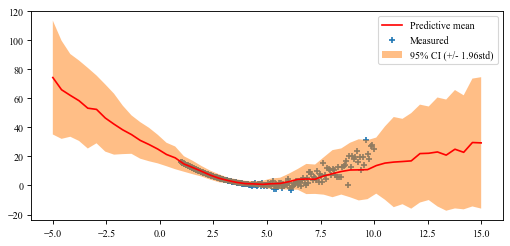

In [7]:
cm = 1/2.54 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 9

X_test = np.linspace(-5, 15, 50).reshape(-1, 1)
Y_test = np.zeros([len(X_test), 100])
for j in range(100):
    Y_test[:,j]= np.squeeze(model.predict(X_test))
Pred = np.mean(Y_test, axis=1)
Stdv = np.std(Y_test, axis=1)

X_test = np.squeeze(X_test)    
fig, ax = plt.subplots(1, figsize=(17*cm, 8*cm), sharey='row', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, right=.98, top=0.98, bottom=0.15, hspace = 0.65, wspace=0.15)
ax.plot(X_test, Pred, 'r-', label='Predictive mean');
ax.scatter(X,Y, marker='+', label='Measured');
ax.fill_between(X_test,Pred+1.96*Stdv,Pred-1.96*Stdv,
                 alpha=0.5, label='95% CI (+/- 1.96std)')
ax.legend()

Compute the model uncertainty

In [22]:
def compute_predictions_pbnn(model, examples):
    prediction_distribution= model(examples)
    prediction_mean = np.squeeze(prediction_distribution.mean().numpy())
    prediction_stdv = np.squeeze(prediction_distribution.stddev().numpy())
    # The 95% CI is computed as mean ± (1.96 * stdv)
    upper = (prediction_mean + (1.96 * prediction_stdv))
    lower = (prediction_mean - (1.96 * prediction_stdv))

    return prediction_mean, prediction_stdv, upper, lower


Means = np.zeros([len(X_test), 100])
Stdvs = np.zeros([len(X_test), 100])
for j in range(100):
    prediction_mean, prediction_stdv, upper, lower = compute_predictions_pbnn(model, X_test)
    Means[:,j] = prediction_mean
    Stdvs[:,j] = prediction_stdv

Expected_Mean = np.mean(Means,axis=1)
Standdev_Mean = np.std(Means,axis=1)

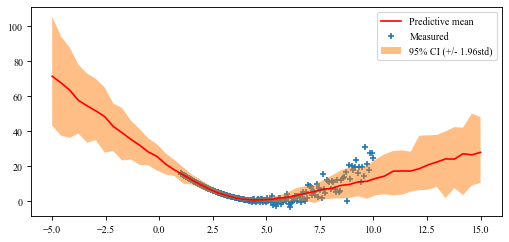

In [25]:
fig, ax = plt.subplots(1, figsize=(17*cm, 8*cm), sharey='row', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, right=.98, top=0.98, bottom=0.15, hspace = 0.65, wspace=0.15)
ax.plot(X_test, Expected_Mean, 'r-', label='Predictive mean');
ax.scatter(X,Y, marker='+', label='Measured');
ax.fill_between(X_test,Pred+1.96*Standdev_Mean,Pred-1.96*Standdev_Mean,
                 alpha=0.5, label='95% CI (+/- 1.96std)')
ax.legend()